Pergunta (3) Como é a distribuição de gênero de livro para homens e mulheres? (Fazer um gráfico)

In [3]:
import pandas as pd

In [4]:
database = pd.read_csv('good_reads_final.csv')
# para ver o nome das colunas e o formato dos registros do dataset
database.head(1)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230


In [6]:
# Separando os registros de autoras
conj_mulheres = database.query('author_gender == "female"', inplace = False)
len(conj_mulheres)

10690

In [7]:
# Separando os registros de autores
conj_homens = database.query('author_gender == "male"', inplace = False)
len(conj_homens)

12201

Como temos quase 2 mil registros a mais referente aos homens comparado com os registros associados às mulheres, vamos limitar a quantidade do dataset "conj_homens" ao mesmo tamanho do dataset "conj_mulheres".

In [8]:
# Separando os registros de autores
conj_homens = database.query('author_gender == "male"', inplace = False).head(len(conj_mulheres))
len(conj_homens)

10690

In [9]:
generosliter_por_mulher = pd.value_counts(conj_mulheres['author_genres'])
generosliter_por_homem = pd.value_counts(conj_homens['author_genres'])

In [10]:
# identificando os generos literarios mais frequentes para mulheres escritoras
generosliter_por_mulher.nlargest(n=10)

romance,                    1972
young-adult,                1633
literature-fiction,          643
fiction,                     365
science-fiction-fantasy,     355
historical-fiction,          317
fantasy,                     259
contemporary,                226
children-s-books,            204
mystery-thrillers,           198
Name: author_genres, dtype: int64

In [11]:
# Montando o grafico
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Imprime grafico dado o dataset e um limit (default=10)
def plot_pie_graph(dataset, genero='', limit=10):
    labels = dataset.nlargest(n=limit).index.tolist()
    sizes = dataset.nlargest(n=limit).values

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax1.set_title('Qtd de Obras Literárias por Gênero '+genero )
    
    plt.show()

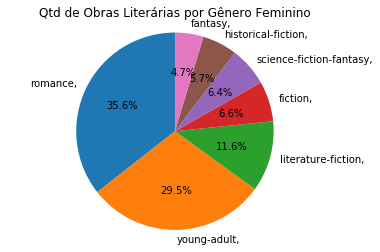

In [28]:
plot_pie_graph(generosliter_por_mulher, 'Feminino', 7)

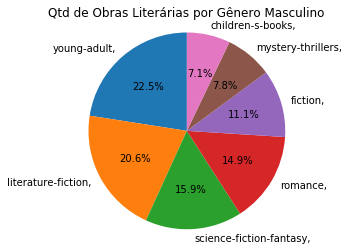

In [29]:
plot_pie_graph(generosliter_por_homem, 'Masculino', 7)

In [30]:
# Imprime grafico dado o dataset e um limit (default=10)
def plot_bar_graph(dataset1, dataset2, limit=10):
    
    labels = dataset1.nlargest(n=limit).index.tolist()
    sizes1 = dataset1.nlargest(n=limit).values
    sizes2 = dataset2.nlargest(n=limit).values
        
    espaco_entre_bar = np.arange(len(labels))  # the label locations
    largura_bar = 0.35
    
    fig1, ax1 = plt.subplots()
    ax1.bar(espaco_entre_bar - largura_bar/2, height=sizes1, width=largura_bar, label='Mulheres')
    ax1.bar(espaco_entre_bar + largura_bar/2, height=sizes2, width=largura_bar, label='Homens')
    
    ax1.set_ylabel('Qtd de Obras de Um Gênero Literário')
    ax1.set_title('Qtd de Obras Literárias por Gênero')
    
    ax1.set_xticks(espaco_entre_bar)
    ax1.set_xticklabels(labels, rotation=90)
    
    ax1.legend()
    
    plt.show()

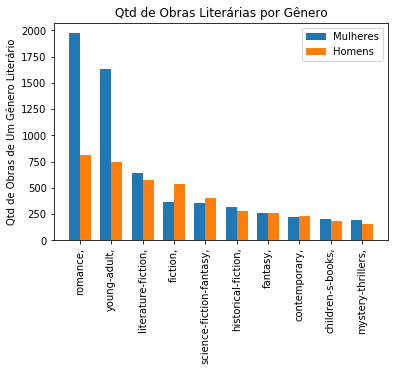

In [31]:
plot_bar_graph(generosliter_por_mulher, generosliter_por_homem, limit=10)

Observando os gráficos, nota-se o Romance muito mais comum entre os escritores femininos do que entre os escritores masculinos, e a Ficção muito mais comum entre autores do que autoras.